# Importing libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'D:\A4 Python\Final data'

In [3]:
high_act_cust = pd.read_pickle(os.path.join(path, 'final_with_profiles.pkl'))

In [4]:
high_act_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,_merge,region,customer_activity,age_group,income_group,department,dependant_type,family_type,time_period,day
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Midwest,High activity,40-49,Upper income,beverages,has no kids,Married with dependants,Morning,Sunday
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Midwest,High activity,40-49,Upper income,beverages,has no kids,Married with dependants,Afternoon,Thursday
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Midwest,High activity,40-49,Upper income,beverages,has no kids,Married with dependants,Afternoon,Sunday
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,both,West,High activity,30-39,Middle income,beverages,has no kids,Single no dependants,Morning,Friday
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,both,West,High activity,30-39,Middle income,beverages,has no kids,Single no dependants,Evening,Sunday


# Comparing customer profiles and their charts

In [5]:
high_act_cust['age_group'].value_counts()

65 and older    8195544
18-29           5817603
40-49           4883179
30-39           4847507
50-59           4841771
60-65           2378960
Name: age_group, dtype: int64

### Age group and regions

In [14]:
age_by_region = pd.crosstab(high_act_cust['age_group'],high_act_cust['region'], dropna = False)

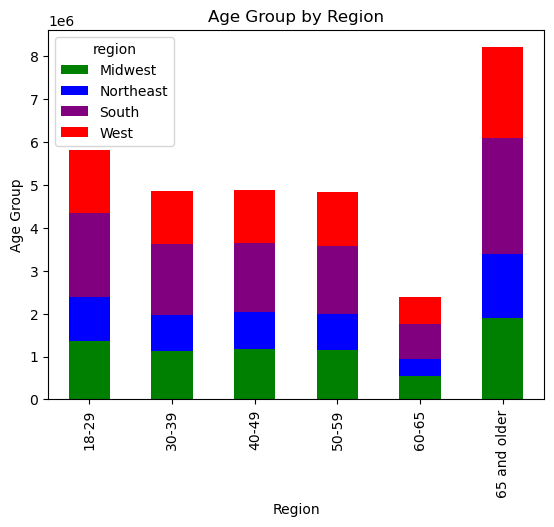

In [17]:
age_by_region_bar = age_by_region.plot.bar(color = family_colors, stacked = True)
plt.title("Age Group by Region")
plt.xlabel("Region")
plt.ylabel("Age Group")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'age_by_region_bar.png'), bbox_inches='tight')

Text(0, 0.5, 'Number of Orders')

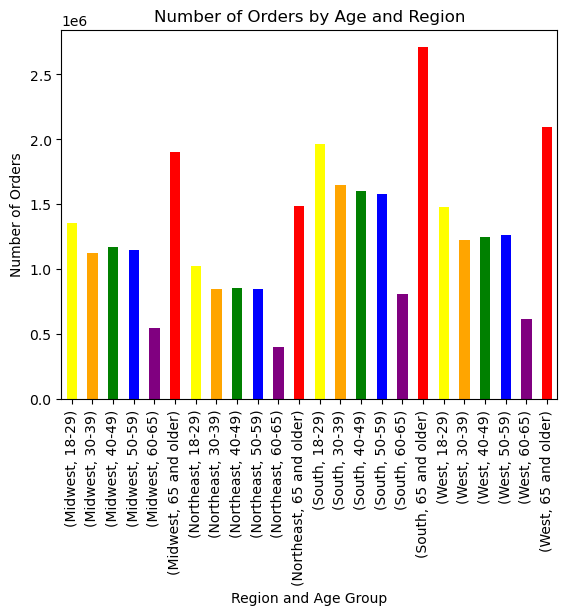

In [6]:
age_region_bar = high_act_cust[['region', 'age_group']].value_counts().sort_index().plot.bar(color = ['yellow', 'orange', 'green', 'blue', 'purple', 'red'])
plt.title("Number of Orders by Age and Region")
plt.xlabel("Region and Age Group")
plt.ylabel("Number of Orders")

In [6]:
vis_path = r'C:\Users\sjvai\Documents\07-23 Instacart Basket Analysis'

In [8]:
age_region_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

### Income by region

In [4]:
income_by_region = pd.crosstab(high_act_cust['income_group'],high_act_cust['region'], dropna = False)

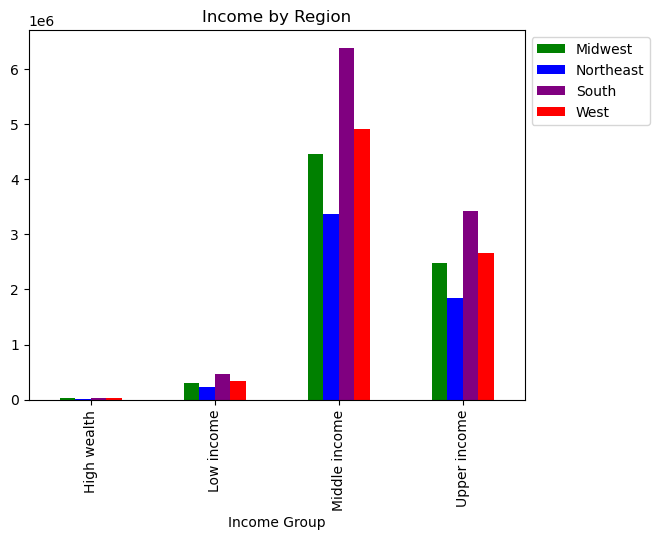

In [7]:
income_region_bar = income_by_region.plot.bar(color = ['green', 'blue', 'purple', 'red'])
plt.title("Income by Region")
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'income_region_bar.png'), bbox_inches='tight')

In [14]:
income_region_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

### Family by region

In [9]:
fam_by_region = pd.crosstab(high_act_cust['family_type'],high_act_cust['region'], dropna = False)

In [16]:
fam_by_region

region,Midwest,Northeast,South,West
family_type,,,,
Married no dependants,1719671,1289545,2368910,1832935
Married with dependants,3367591,2564228,4854839,3745992
Single no dependants,1822816,1354482,2581933,1980450
Single with dependants,351435,256430,505457,367850


In [8]:
family_colors = ['green', 'blue', 'purple', 'red']

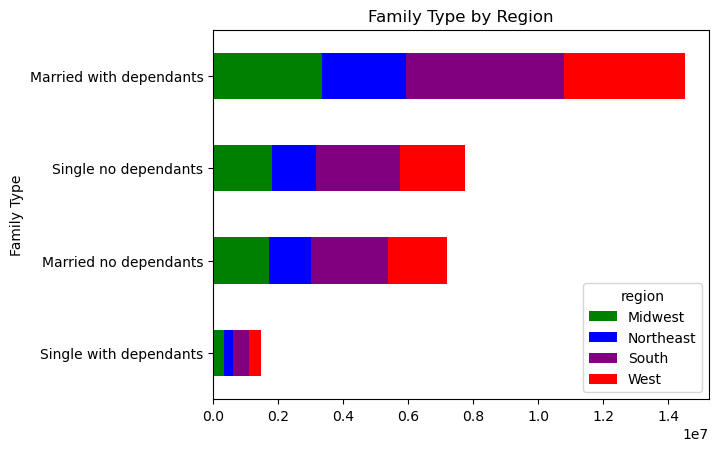

In [10]:
fam_by_region_bar = fam_by_region.sort_values(by=['West'], ascending=True).plot.barh(color = family_colors, stacked = True)
plt.title("Family Type by Region")
plt.ylabel("Family Type")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'fam_by_region_bar.png'), bbox_inches='tight')

In [20]:
fam_by_region_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'fam_by_region_bar.png'))

### Department by age

In [11]:
dep_by_age = pd.crosstab(high_act_cust['department'],high_act_cust['age_group'], dropna = False)

In [12]:
age_colors = ['powderblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'navy']

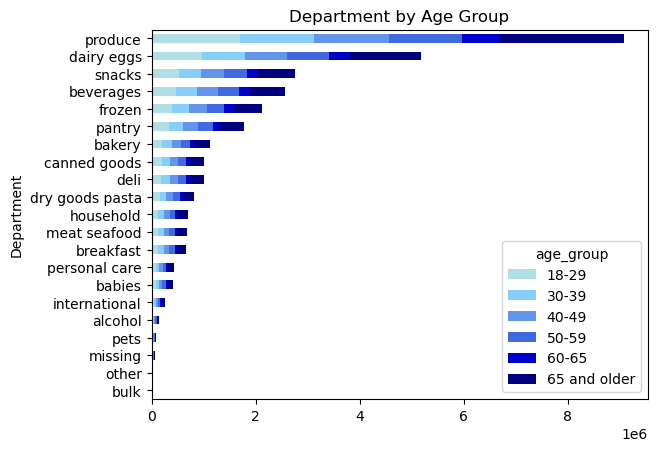

In [13]:
dep_by_age_bar = dep_by_age.sort_values(by=['65 and older'], ascending=True).plot.barh(color = age_colors, stacked = True)
plt.title("Department by Age Group")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_age_bar.png'), bbox_inches='tight')

In [26]:
dep_by_age_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_age_bar.png'))

### Income by department

In [19]:
dep_by_income = pd.crosstab(high_act_cust['department'],high_act_cust['income_group'], dropna = False)

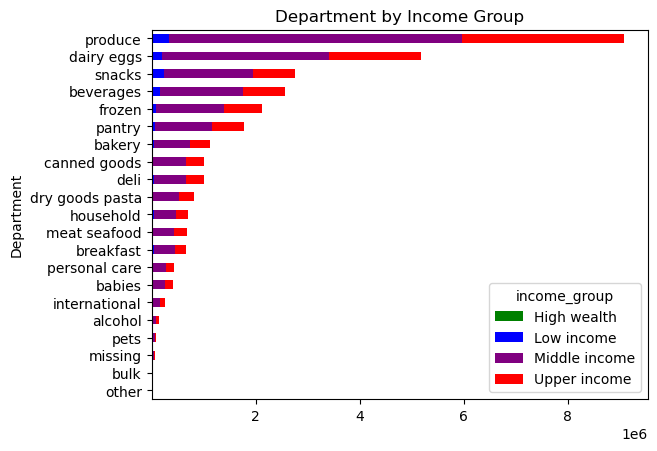

In [20]:
dep_by_income_bar = dep_by_income.sort_values(by=['Middle income'], ascending=True).plot.barh(color = ['green', 'blue', 'purple', 'red'], stacked = True)
plt.title("Department by Income Group")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_income_bar.png'), bbox_inches='tight')

In [31]:
dep_by_income_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_income_bar.png'))

### Family type by department

In [21]:
dep_by_fam = pd.crosstab(high_act_cust['department'],high_act_cust['family_type'], dropna = False)

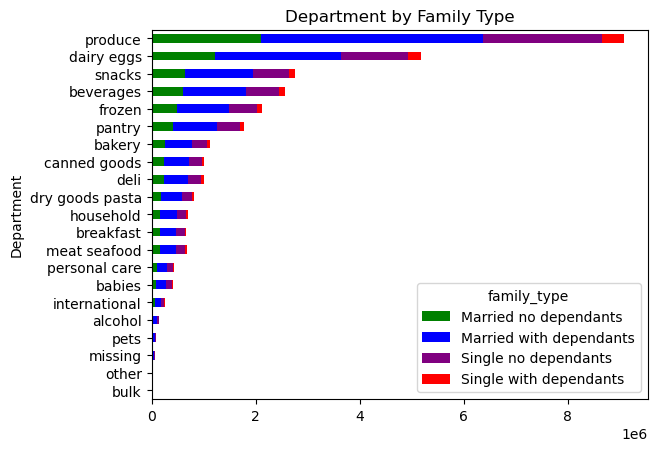

In [22]:
dep_by_fam_bar = dep_by_fam.sort_values(by=['Single with dependants'], ascending=True).plot.barh(color = ['green', 'blue', 'purple', 'red'], stacked = True)
plt.title("Department by Family Type")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_fam_bar.png'), bbox_inches='tight')

In [37]:
dep_by_fam_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_fam_bar.png'))

### Department by region

In [23]:
dep_by_region = pd.crosstab(high_act_cust['department'],high_act_cust['region'], dropna = False)

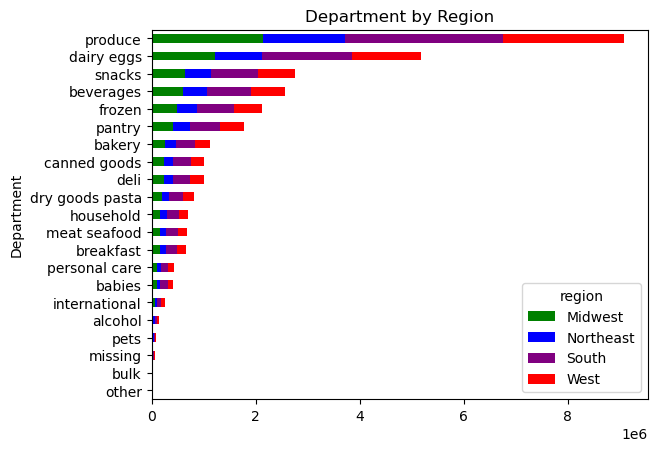

In [24]:
dep_by_region_bar = dep_by_region.sort_values(by=['West'], ascending=True).plot.barh(color = ['green', 'blue', 'purple', 'red'], stacked = True)
plt.title("Department by Region")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_region_bar.png'), bbox_inches='tight')

In [39]:
dep_by_region_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_by_region_bar.png'))

### Loyalty by department

In [25]:
loyal_by_dept = pd.crosstab(high_act_cust['department'],high_act_cust['loyalty_flag'], dropna = False)

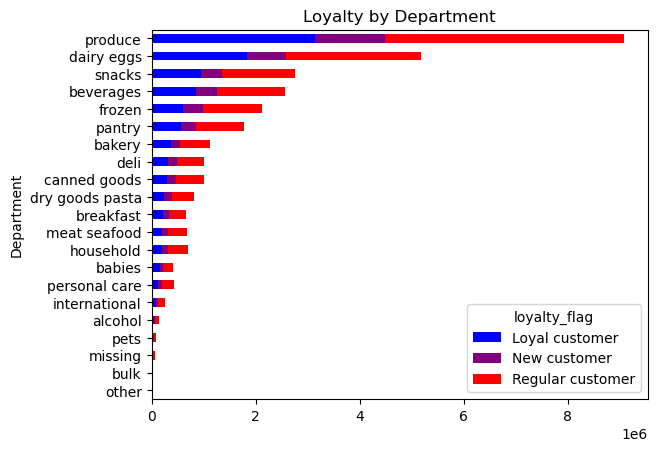

In [26]:
loyal_by_dept_bar = loyal_by_dept.sort_values(by=['Loyal customer'], ascending=True).plot.barh(color = ['blue', 'purple', 'red'], stacked = True)
plt.title("Loyalty by Department")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyal_by_dept_bar.png'), bbox_inches='tight')

In [43]:
loyal_by_dept_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyal_by_dept_bar.png'))

### Loyalty orders day of week

In [27]:
loyal_dow = pd.crosstab(high_act_cust['orders_day_of_week'],high_act_cust['loyalty_flag'], dropna = False)

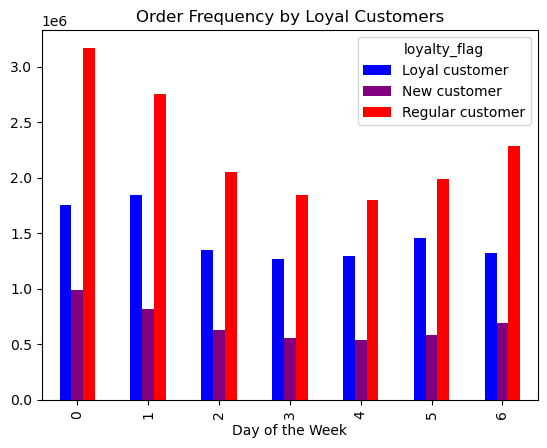

In [28]:
loyal_dow_bar = loyal_dow.plot.bar(color = ['blue', 'purple', 'red'])
plt.title("Order Frequency by Loyal Customers")
plt.xlabel("Day of the Week")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyal_dow_bar.png'), bbox_inches='tight')

In [46]:
loyal_dow_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyal_dow_bar.png'))

### Order frequency by loyalty

Text(0.5, 0, 'Order Frequency')

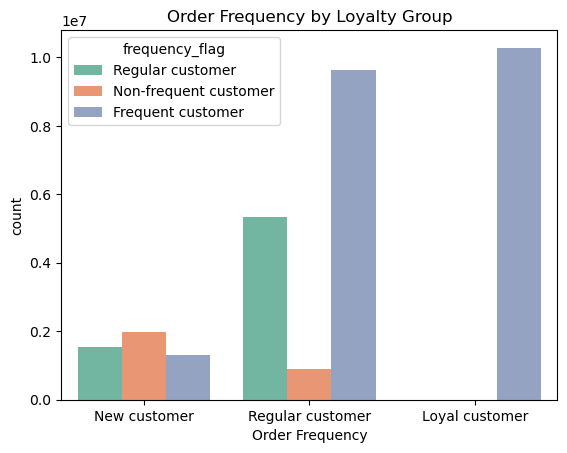

In [50]:
loyalty_freq = sns.countplot(x='loyalty_flag', hue='frequency_flag', data=high_act_cust, palette='Set2')
plt.title('Order Frequency by Loyalty Group')
plt.xlabel('Order Frequency')

In [51]:
loyalty_freq.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyalty_freq.png'))

### Price groups

In [29]:
#Assigning price groups

high_act_cust.loc[high_act_cust['prices'] <= 5, 'product_price_range'] = 'Low price'
high_act_cust.loc[(high_act_cust['prices'] > 5) & (high_act_cust['prices'] < 19), 'product_price_range'] = 'Mid price'
high_act_cust.loc[high_act_cust['prices'] >= 20, 'product_price_range'] = 'High price'

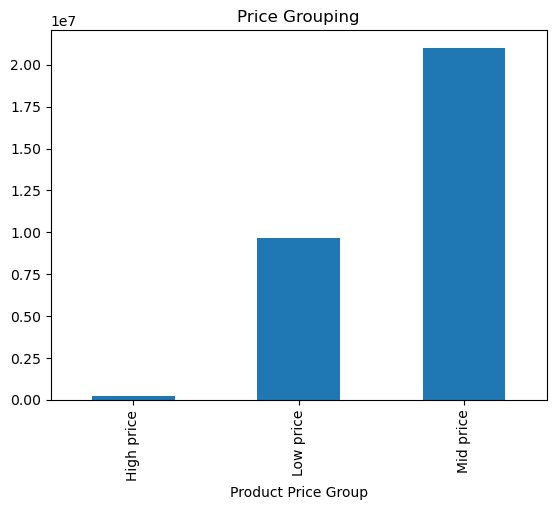

In [30]:
price_group_bar = high_act_cust['product_price_range'].value_counts().sort_index().plot.bar()
plt.title("Price Grouping")
plt.xlabel("Product Price Group")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'price_group_bar.png'), bbox_inches='tight')

In [57]:
price_group_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'price_group_bar.png'))

In [31]:
price_by_dept = pd.crosstab(high_act_cust['department'],high_act_cust['product_price_range'], dropna = False)

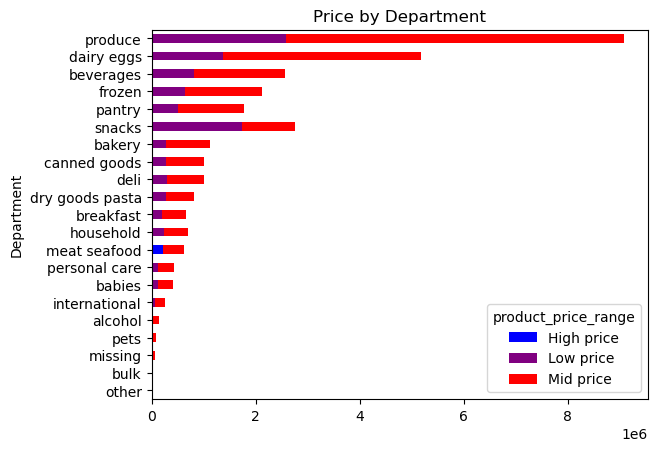

In [32]:
price_by_dept_bar = price_by_dept.sort_values(by=['Mid price'], ascending=True).plot.barh(color = ['blue', 'purple', 'red'], stacked = True)
plt.title("Price by Department")
plt.ylabel("Department")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'price_by_dept_bar.png'), bbox_inches='tight')

In [61]:
price_by_dept_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'price_by_dept_bar.png'))

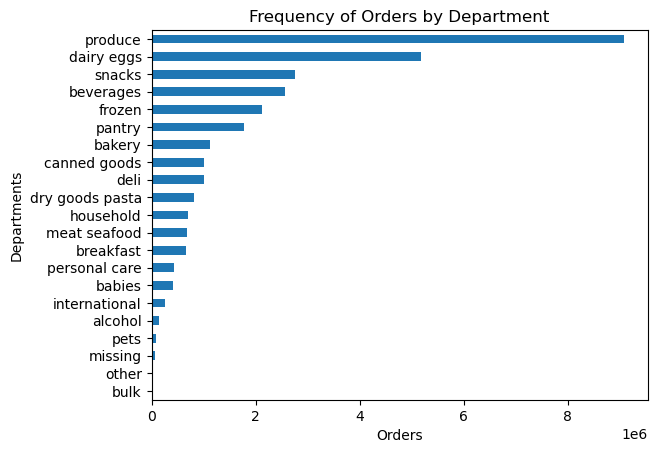

In [33]:
dep_ord_freq = high_act_cust['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Frequency of Orders by Department")
plt.xlabel("Orders")
plt.ylabel("Departments")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_ord_freq.png'), bbox_inches='tight')

In [63]:
dep_ord_freq.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dep_ord_freq.png'))

Text(0.5, 0, 'Day of the Week')

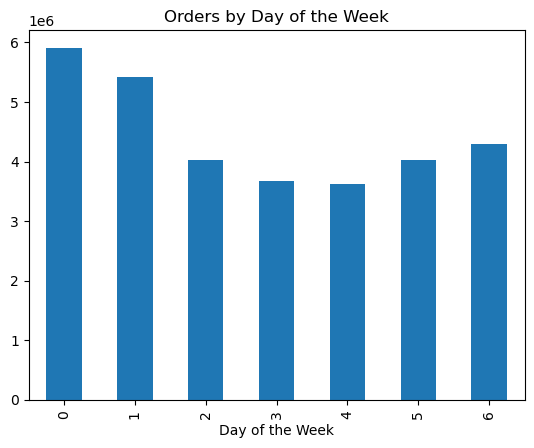

In [65]:
dow_bar = high_act_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")

In [66]:
dow_bar.figure.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'dow_bar.png'))

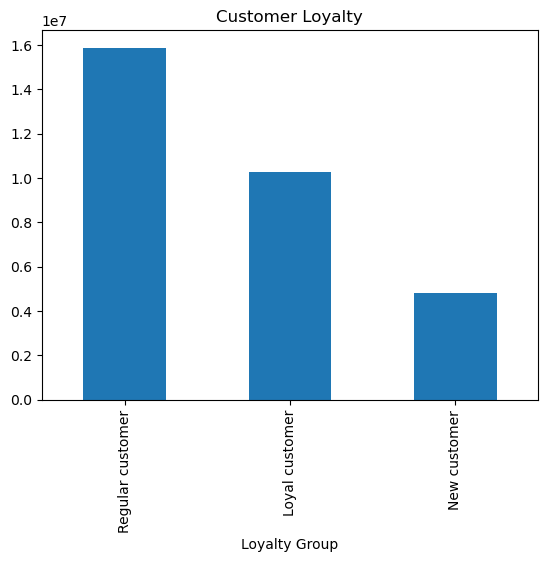

In [35]:
#Loyalty distro
bar_loyalty_flag = high_act_cust['loyalty_flag'].value_counts().plot.bar()
plt.title("Customer Loyalty")
plt.xlabel("Loyalty Group")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight')

In [36]:
loyalty_by_price = pd.crosstab(high_act_cust['loyalty_flag'],high_act_cust['product_price_range'], dropna = False)

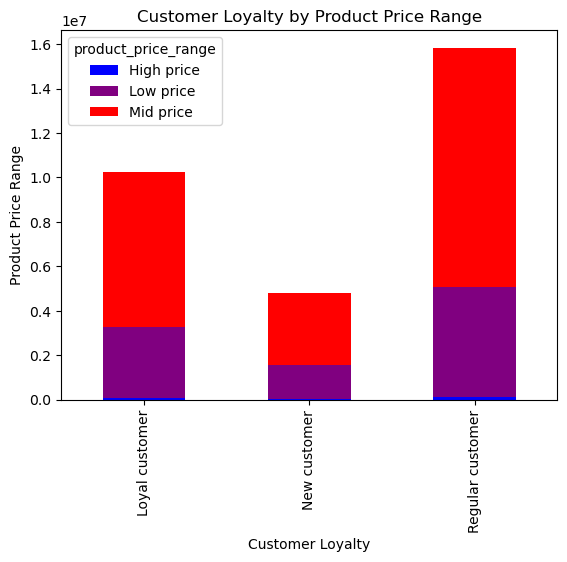

In [40]:
loyalty_by_price_bar = loyalty_by_price.plot.bar(color = ['blue', 'purple', 'red'], stacked = True)
plt.title("Customer Loyalty by Product Price Range")
plt.xlabel("Customer Loyalty")
plt.ylabel("Product Price Range")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'loyalty_by_price_bar.png'), bbox_inches='tight')

In [41]:
fam_by_age = pd.crosstab(high_act_cust['family_type'],high_act_cust['age_group'], dropna = False)

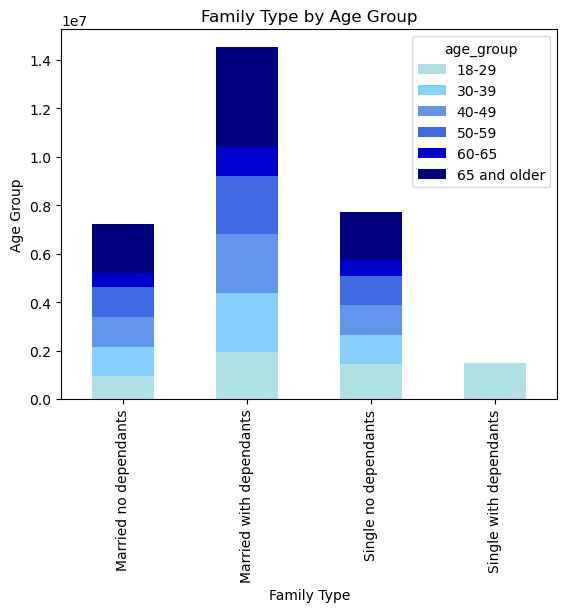

In [43]:
fam_by_age_bar = fam_by_age.plot.bar(color = age_colors, stacked = True)
plt.title("Family Type by Age Group")
plt.xlabel("Family Type")
plt.ylabel("Age Group")
plt.savefig(os.path.join(vis_path, '04 Analysis', 'Visualizations', 'fam_by_age_bar.png'), bbox_inches='tight')